# Homework
## Can Gözpınar 68965

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Read in Data from csv files

In [48]:
#read in data from csv files
dataSetImages = np.genfromtxt("hw02_data_set_images.csv", delimiter = ",") #data 
dataSetLabels = np.genfromtxt("hw02_data_set_labels.csv", dtype = 'str') #labels
#get rid of "" around class names
dataSetLabels = np.char.strip(dataSetLabels, '"').astype(str)
dataSet = np.hstack((dataSetImages, dataSetLabels[:, None])) #321th column is label of the xi

### Divide the data set

In [51]:
#first 25 of each class to training set
trainingDataSet = np.vstack((dataSet[dataSet[:,-1] == 'A'][0:25], dataSet[dataSet[:,-1] == 'B'][0:25], dataSet[dataSet[:,-1] == 'C'][0:25], dataSet[dataSet[:,-1] == 'D'][0:25], dataSet[dataSet[:,-1] == 'E'][0:25]))

#last 14 of each class to test set
testDataSet = np.vstack((dataSet[dataSet[:,-1] == 'A'][25:], dataSet[dataSet[:,-1] == 'B'][25:], dataSet[dataSet[:,-1] == 'C'][25:], dataSet[dataSet[:,-1] == 'D'][25:], dataSet[dataSet[:,-1] == 'E'][25:]))

### Learn multiclass using Sigmoid function

In [54]:
# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [56]:
# define the gradient functions
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(np.repeat((Y_truth[:,c] - Y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(5)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

In [58]:
# set learning parameters
eta = 0.01
epsilon = 1e-3

In [60]:
# randomly initalize W and w0
np.random.seed(1)
W = np.random.uniform(low = -0.01, high = 0.01, size = (trainingDataSet.shape[1] - 1, 5))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, 5))

In [62]:
def safelog(x):
    return(np.log(x + 1e-100))#to prevent log0

In [64]:
# one-of-K encoding
y_truth = trainingDataSet[:,-1]
Y_truth = np.zeros((len(y_truth), 5)).astype(int)
for i in range(y_truth.shape[0]):
    if(y_truth[i] == 'A'):
        Y_truth[i, 0] = 1
    if(y_truth[i] == 'B'):
        Y_truth[i, 1] = 1
    if(y_truth[i] == 'C'):
        Y_truth[i, 2] = 1
    if(y_truth[i] == 'D'):
        Y_truth[i, 3] = 1
    if(y_truth[i] == 'E'):
        Y_truth[i, 4] = 1

In [66]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    X = trainingDataSet[:,:-1].astype(float)
    Y_predicted = sigmoid(X,W,w0)

    objective_values = np.append(objective_values, -np.sum(Y_truth * safelog(Y_predicted)))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(X, Y_truth, Y_predicted)
    w0 = w0 - eta * gradient_w0(Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1

## Plot the objective function

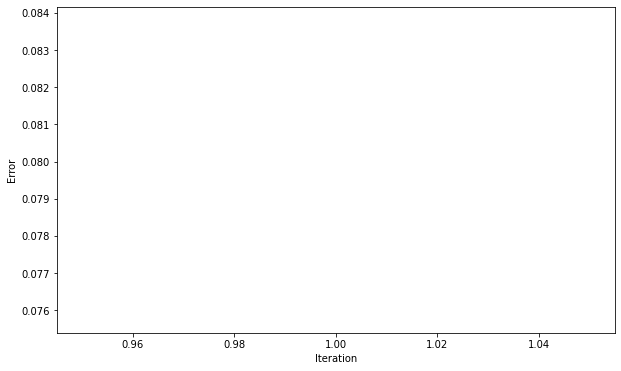

In [68]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Confusion Matrix Calculations

In [76]:
#calculate the confusion matrix for the training data set
y_truth[ y_truth == 'A' ] = 1
y_truth[ y_truth == 'B' ] = 2
y_truth[ y_truth == 'C' ] = 3
y_truth[ y_truth == 'D' ] = 4
y_truth[ y_truth == 'E' ] = 5

y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(Y_predicted)

[[6.57393253e-01 1.85286639e-04 8.30298543e-09 1.25490331e-03
  1.71646417e-05]
 [9.99959770e-01 5.48763093e-09 3.96745312e-06 8.07371825e-06
  5.03647616e-09]
 [9.98676034e-01 3.15516110e-05 1.07978011e-05 3.65101139e-07
  4.04110228e-08]
 [9.93041934e-01 7.35424708e-12 5.63263872e-05 8.02362748e-05
  2.78245685e-06]
 [9.68065433e-01 1.36207811e-05 3.71839071e-09 1.37275085e-04
  4.44738911e-06]
 [9.95943888e-01 2.47297376e-04 1.27732088e-04 6.90966374e-08
  9.28389151e-10]
 [8.91374991e-01 1.66880060e-06 8.82367198e-11 9.33291920e-07
  2.45399565e-06]
 [9.99863020e-01 1.92017946e-07 6.45684920e-12 4.43000107e-06
  2.12882582e-05]
 [9.99873033e-01 2.72058026e-05 5.25202563e-09 3.40095661e-09
  1.27473054e-07]
 [9.95359097e-01 1.77402792e-05 1.55697113e-12 6.69426686e-05
  5.90609149e-05]
 [9.38547503e-01 2.72383922e-06 1.44106460e-10 1.26274350e-02
  1.38159758e-04]
 [9.99940084e-01 9.14378839e-05 7.60370153e-11 3.24970360e-06
  7.26648759e-09]
 [7.69892320e-01 9.99789425e-01 1.525413

In [72]:
#calculate the confusion matrix for the test data set
y_truth = testDataSet[:,-1]
y_truth[ y_truth == 'A' ] = 1
y_truth[ y_truth == 'B' ] = 2
y_truth[ y_truth == 'C' ] = 3
y_truth[ y_truth == 'D' ] = 4
y_truth[ y_truth == 'E' ] = 5

X = testDataSet[:,:-1].astype(float)
Y_predicted = sigmoid(X,W,w0)
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        13   1   0   0   0
2         1  11   0   0   2
3         0   0  14   0   0
4         0   0   0  14   0
5         0   2   0   0  12
